In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [112]:
Trained_Data = pd.read_csv("KDDTrain+.txt" )
Tested_Data  = pd.read_csv("KDDTest+.txt")

In [113]:
Trained_Data.shape

(125972, 43)

In [114]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [115]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

In [116]:
"attack" in Tested_Data.columns

True

In [117]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'teardrop', 'warezclient', 'perl', 'buffer_overflow', 'ftp_write', 'portsweep', 'imap', 'warezmaster', 'smurf', 'normal', 'phf', 'land', 'ipsweep', 'nmap', 'spy', 'satan', 'multihop', 'neptune', 'rootkit', 'back', 'pod', 'loadmodule', 'guess_passwd'} 

In [118]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack
Trained_Data.shape

(125972, 44)

In [119]:
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(Trained_Data[features_to_encode])
test_encoded_base = pd.get_dummies(Tested_Data[features_to_encode])


test_index = np.arange(len(Tested_Data.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

column_order = encoded.columns.to_list()

test_encoded_temp = test_encoded_base.join(diff_df)

test_final = test_encoded_temp[column_order].fillna(0)

numeric_features = ['duration', 'src_bytes', 'dst_bytes']

to_fit = encoded.join(Trained_Data[numeric_features])
test_set = test_final.join(Tested_Data[numeric_features])

In [120]:


Trained_Data.drop(['protocol_type', 'service', 'flag','duration', 'src_bytes', 'dst_bytes'], axis=1, inplace=True)
Tested_Data.drop(['protocol_type', 'service', 'flag','duration', 'src_bytes', 'dst_bytes'], axis=1, inplace=True)



In [121]:

Trained_Data = Trained_Data.join(to_fit)
Tested_Data = Tested_Data.join(test_set)


In [122]:
Tested_Data.shape

(22543, 125)

In [123]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])


In [124]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']


In [125]:

print(X_train.shape)
print(X_test.shape)


(125972, 124)
(22543, 124)


In [126]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])


In [127]:

Ro_scaler = RobustScaler()
X_train = Ro_scaler.fit_transform(X_train)
X_test = Ro_scaler.fit_transform(X_test)

In [99]:
len(X_test[0])

124

In [100]:
A = sm.add_constant(X_train)
Est1 = sm.GLM(Y_train, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125972
Model:                            GLM   Df Residuals:                   125852
Model Family:                Gaussian   Df Model:                          119
Link Function:               Identity   Scale:                        0.021929
Method:                          IRLS   Log-Likelihood:                 61917.
Date:                Sun, 25 Feb 2024   Deviance:                       2759.8
Time:                        06:51:23   Pearson chi2:                 2.76e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.005     -0.544      0.587      -0.013       0.008
x1            -0.3573      0.030    -11.833      0.000      -0.416      -0.298
x2             0.1395      0.002     68.163      0.000       0.135       0.144
x3            -0.0318      0.029     -1.078      0.281      -0.090       0.026
x4             0.0125      0.000     32.250      0.000       0.012       0.013
x5            -0.0524      0.010     -5.496      0.000      -0.071      -0.034
x6             0.1497      0.003     45.117      0.000       0.143       0.156
x7             0.0030      0.001      5.775      0.000       0.002       0.004
x8            -0.0419      0.015     -2.858      0.004      -0.071      -0.013
x9            -0.0386      0.015     -2.560      0.010      -0.068      -0.009
x10           -0.0030      0.001     -5.741      0.000      -0.004      -0.002
x11           -0.0119      0.001    -13.278      0.000      -0.014      -0.010
x12           -0.1007      0.019     -5.281      0.000      -0.138      -0.063
x13            0.0103      0.006      1.789      0.074      -0.001       0.022
x14         1.738e-15   1.14e-15      1.518      0.129   -5.05e-16    3.98e-15
x15           -0.3446      0.148     -2.325      0.020      -0.635      -0.054
x16           -0.2940      0.011    -27.095      0.000      -0.315      -0.273
x17            0.0384      0.001     30.633      0.000       0.036       0.041
x18            0.0014      0.000      6.816      0.000       0.001       0.002
x19           -0.0660      0.010     -6.291      0.000      -0.087      -0.045
x20            0.2799      0.011     24.504      0.000       0.258       0.302
x21           -0.1146      0.011    -10.207      0.000      -0.137      -0.093
x22            0.5408      0.013     41.412      0.000       0.515       0.566
x23           -0.3340      0.003    -98.730      0.000      -0.341      -0.327
x24           -0.0076      0.000    -33.960      0.000      -0.008      -0.007
x25            0.0579      0.002     27.740      0.000       0.054       0.062
x26            0.0553      0.001     49.006      0.000       0.053       0.058
x27           -0.0945      0.003    -32.541      0.000      -0.100      -0.089
x28            0.0049      0.003      1.440      0.150      -0.002       0.011
x29            0.0098      0.000     33.792      0.000       0.009       0.010
x30            0.0072      0.000     46.137      0.000       0.007       0.008
x31            0.0022      0.000     18.576      0.000       0.002       0.002
x32           -0.0741      0.006    -11.429      0.000      -0.087      -0.061
x33            0.0657      0.008      8.185      0.000       0.050       0.081
x34            0.0624      0.004     13.873      0.000       0.054       0.071
x35            0.2157      0.006     35.290      0.000       0.204       0.228
x3

In [128]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):

    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)

    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')

    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")


In [129]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_

    return (Model_Name)

In [ ]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Parameters={ 'max_depth': max_depth}

In [ ]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train, Y_train)

RandomForestClassifier(max_depth=11)

In [ ]:
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
RF.score(X_test, Y_test)

0.9607416936521315

In [ ]:

from sklearn.metrics import roc_curve

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 0.961

The Random Forest Classifier Model Sensitvity = 0.95

The Random Forest Classifier Model Precision  = 0.98

The Random Forest Classifier Model F1 Score   = 0.965

The Random Forest Classifier Model Recall     = 0.95

--------------------------------------------------



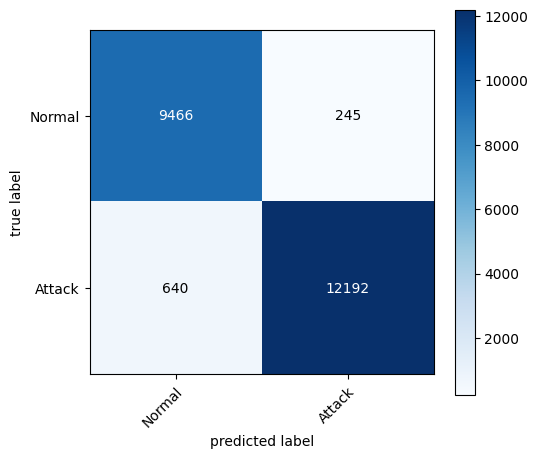

In [ ]:
Evaluate('Random Forest Classifier', RF, X_test, Y_test)

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(Y_test, RF.predict(X_test))

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm_norm, columns=['Normal', 'Attack'], index=['Normal', 'Attack'])

print(cm_df)


          Normal    Attack
Normal  0.974771  0.025229
Attack  0.049875  0.950125


In [ ]:
KNN= KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

--------------------------------------------------

The K Nearest neighbor Model Accuracy   = 0.842

The K Nearest neighbor Model Sensitvity = 0.735

The K Nearest neighbor Model Precision  = 0.982

The K Nearest neighbor Model F1 Score   = 0.841

The K Nearest neighbor Model Recall     = 0.735

--------------------------------------------------



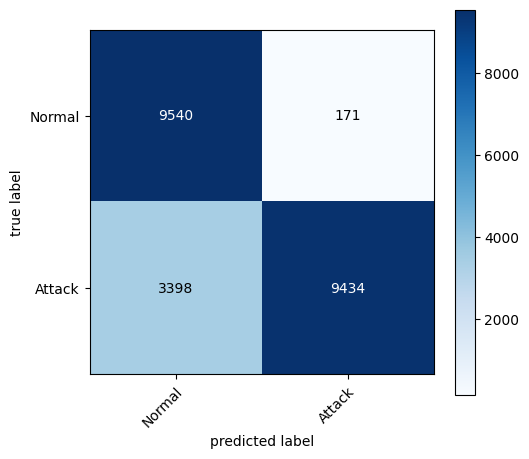

In [ ]:
Evaluate('K Nearest neighbor', KNN, X_test, Y_test)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(Y_test, KNN.predict(X_test))

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm_norm, columns=['Normal', 'Attack'], index=['Normal', 'Attack'])

print(cm_df)

          Normal    Attack
Normal  0.982391  0.017609
Attack  0.264807  0.735193


In [ ]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train, Y_train)

LinearSVC(C=1)

--------------------------------------------------

The Linear SVC Model Accuracy   = 0.845

The Linear SVC Model Sensitvity = 0.801

The Linear SVC Model Precision  = 0.917

The Linear SVC Model F1 Score   = 0.855

The Linear SVC Model Recall     = 0.801

--------------------------------------------------



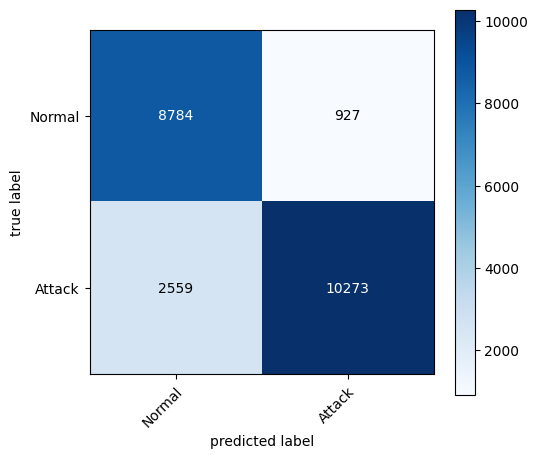

In [ ]:
Evaluate('Linear SVC', Linear_SVC, X_test, Y_test)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(Y_test, Linear_SVC.predict(X_test))

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm_norm, columns=['Normal', 'Attack'], index=['Normal', 'Attack'])

print(cm_df)

          Normal    Attack
Normal  0.904541  0.095459
Attack  0.199423  0.800577


In [130]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_train)


KMeans(n_clusters=7)

In [131]:
X_train_df = pd.DataFrame(X_train)


X_train_df['Predicted_Cluster'] = kmeans.predict(X_train)
X_train = X_train_df.to_numpy()


In [132]:
X_test_df = pd.DataFrame(X_test)
X_test_df['Predicted_Cluster'] = kmeans.predict(X_test)
X_test = X_test_df.to_numpy()

In [133]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Parameters={ 'max_depth': max_depth}

In [134]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train, Y_train)

RandomForestClassifier(max_depth=10)

In [136]:
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [137]:
RF.score(X_test, Y_test)

0.9409572816395333

--------------------------------------------------

The K Nearest neighbor Model Accuracy   = 0.941

The K Nearest neighbor Model Sensitvity = 0.915

The K Nearest neighbor Model Precision  = 0.979

The K Nearest neighbor Model F1 Score   = 0.946

The K Nearest neighbor Model Recall     = 0.915

--------------------------------------------------



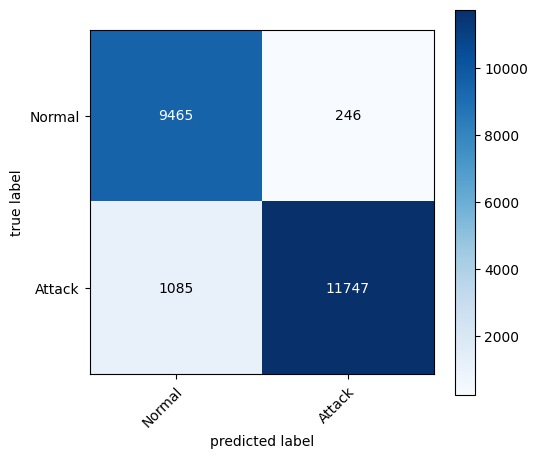

In [138]:
Evaluate('K Nearest neighbor', RF, X_test, Y_test)

In [139]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(Y_test, RF.predict(X_test))

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm_norm, columns=['Normal', 'Attack'], index=['Normal', 'Attack'])

print(cm_df)

          Normal    Attack
Normal  0.974668  0.025332
Attack  0.084554  0.915446


with out kmean

          Normal    Attack
Normal  0.974771  0.025229
Attack  0.049875  0.950125

In [78]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train, Y_train)

LinearSVC(C=1)

--------------------------------------------------

The Linear SVC Model Accuracy   = 0.858

The Linear SVC Model Sensitvity = 0.825

The Linear SVC Model Precision  = 0.917

The Linear SVC Model F1 Score   = 0.869

The Linear SVC Model Recall     = 0.825

--------------------------------------------------



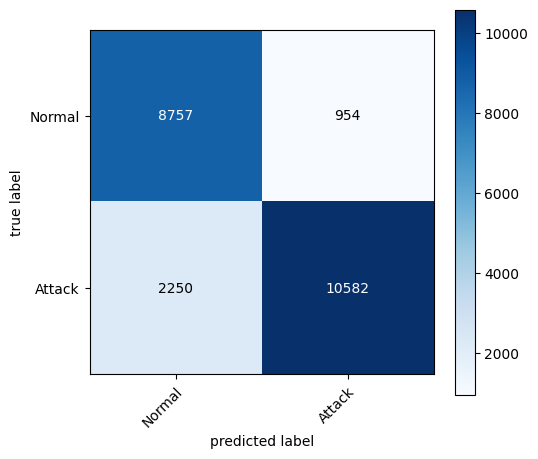

In [80]:
Evaluate('Linear SVC', Linear_SVC, X_test, Y_test)

In [79]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(Y_test, Linear_SVC.predict(X_test))

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm_norm, columns=['Normal', 'Attack'], index=['Normal', 'Attack'])

print(cm_df)

          Normal    Attack
Normal  0.901761  0.098239
Attack  0.175343  0.824657


In [ ]:
          Normal    Attack
Normal  0.904541  0.095459
Attack  0.199423  0.800577